# Prostate Cancer Project
# Metastasis Prediction Using mRNA Expression Data 
# Feature Selection 2nd Step 

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import f_classif

## Import Function

In [2]:
def read_object(obj_path):
    with open(obj_path, 'rb') as input:
        return pickle.load(input)

def save_object(obj, dir_path, file_name, file_extension='pkl', create_dir=True):
    if create_dir:
        if not os.path.isdir(dir_path):
            os.makedirs(dir_path)
    name = os.path.normpath(os.path.join(dir_path, file_name+'.'+file_extension))
    with open(name, 'wb') as output:  # overwrites any existing file
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        return name

## Loading and Preparing Train and Test Data Matrix and Target Vector

In [ ]:
dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Preprocessing_Step/'

file_name = 'Train Matrix.pkl'
train_matrix =read_object(dir_path+file_name)

file_name = 'Test Matrix.pkl'
test_matrix =read_object(dir_path+file_name)

file_name = 'Train Target.pkl'
train_target =read_object(dir_path+file_name)

file_name = 'Test Target.pkl'
test_target =read_object(dir_path+file_name)

dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Reading_Step/'

file_name = 'mRNA ID.pkl'
mRNA_id = read_object(dir_path + file_name)

dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Feature_Selection_Step/'

file_name = 'Selected Features (1st step).pkl'
mRNA_id_prime = read_object(dir_path + file_name)

In [4]:
train_samples_num = train_matrix.shape[0]
test_samples_num = test_matrix.shape[0]
features_num = len(mRNA_id_prime)
train_matrix_prime = np.zeros((train_samples_num, features_num))
test_matrix_prime = np.zeros((test_samples_num, features_num))
for i in range(features_num):
    index = np.argwhere(mRNA_id == mRNA_id_prime[i])
    train_matrix_prime[:,i] = train_matrix[:,index.item()]
    test_matrix_prime[:,i] = test_matrix[:,index.item()]

print(train_matrix_prime.shape)
print(test_matrix_prime.shape)

    

(436, 3935)
(109, 3935)


## Normalization 
## Min-Max or Z-Score

In [5]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(train_matrix_prime)
normal_train_matrix = scaler.transform(train_matrix_prime)
normal_test_matrix = scaler.transform(test_matrix_prime)

## Feature Selection
## Filter Methods 
## ANOVA

In [9]:
f_values, p_values = f_classif(normal_train_matrix, train_target)

In [10]:
f_values

array([0.69526664, 4.12011641, 0.24330536, ..., 1.10933402, 3.36669728,
       0.44061566], shape=(3935,))

In [11]:
p_values

array([0.40483744, 0.0429857 , 0.62207843, ..., 0.29281279, 0.06721126,
       0.50717791], shape=(3935,))

In [12]:
print(f_values.shape)
print(p_values.shape)

(3935,)
(3935,)


In [121]:
sorted_f_values = np.flip(np.sort(f_values))
selected_num = 1800
selected_index = np.zeros(selected_num, dtype=np.int32)
for i in range(selected_num):
    index = np.argwhere(f_values == sorted_f_values[i])
    selected_index[i] = index.item()

selected_train_matrix = normal_train_matrix[:,selected_index]
selected_test_matrix = normal_test_matrix[:,selected_index]
selected_mRNA_id = mRNA_id_prime[selected_index]
print(selected_train_matrix.shape)
print(selected_test_matrix.shape)
print(selected_mRNA_id.shape)

(436, 1800)
(109, 1800)
(1800,)


## PCA and Visualization

In [122]:
pca = PCA(n_components=2)
pca.fit(selected_train_matrix)
train_pca_matrix = pca.transform(selected_train_matrix)
test_pca_matrix = pca.transform(selected_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(436, 2)
(109, 2)


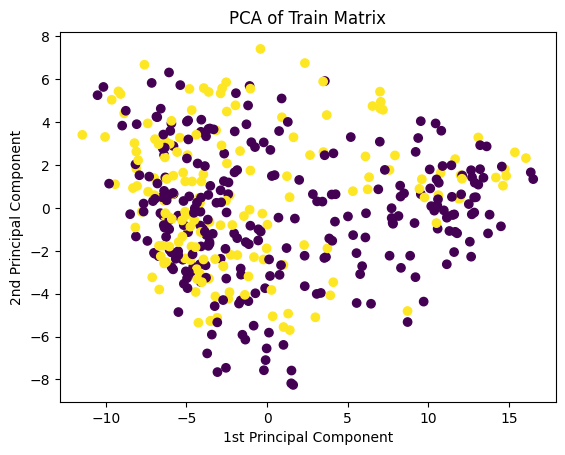

In [123]:
plt.Figure(figsize=(10,10))
fig = plt.scatter(train_pca_matrix[:,0], train_pca_matrix[:,1], c=train_target)
plt.title('PCA of Train Matrix')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

## Classifying based on the PCA Data Matrix

In [138]:
n_components = 300
pca = PCA(n_components=n_components)
pca.fit(selected_train_matrix)
train_pca_matrix = pca.transform(selected_train_matrix)
test_pca_matrix = pca.transform(selected_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(436, 300)
(109, 300)


--------------------------------------------------
Training set
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       270
         1.0       0.96      0.96      0.96       166

    accuracy                           0.97       436
   macro avg       0.97      0.97      0.97       436
weighted avg       0.97      0.97      0.97       436



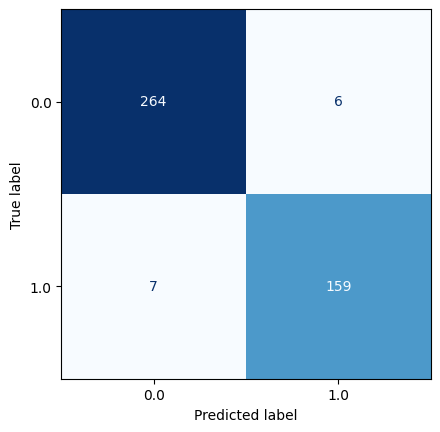

--------------------------------------------------
Test set
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78        63
         1.0       0.72      0.57      0.63        46

    accuracy                           0.72       109
   macro avg       0.72      0.70      0.71       109
weighted avg       0.72      0.72      0.72       109



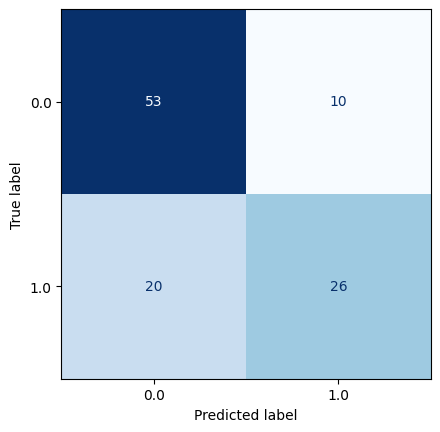

In [139]:
model = LinearDiscriminantAnalysis()
# model = QuadraticDiscriminantAnalysis()
# model = GaussianNB()
model.fit(train_pca_matrix, train_target)
train_pred = model.predict(train_pca_matrix)
test_pred = model.predict(test_pca_matrix)
print('-'*50)
print('Training set')
print(classification_report(train_target, train_pred))

ConfusionMatrixDisplay.from_predictions(train_target, train_pred, cmap='Blues', colorbar=False)
plt.show()

print('-'*50)
print('Test set')
print(classification_report(test_target, test_pred))
ConfusionMatrixDisplay.from_predictions(test_target, test_pred, cmap='Blues', colorbar=False)
plt.show()

## Saving Result

In [ ]:
dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Feature_Selection_Step/'
file_name = 'Selected Features (2nd step)'
save_object(selected_mRNA_id, dir_path, file_name)

'D:\\VSCodes_Saeed\\Prostate Cancer Project (Metastasis Status)(mRNA)\\Feature_Selection_Step\\Selected Features (2nd step).pkl'